In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/saihaneesh26/ML_lab/main/datasets/Advertising_3_.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=2)#stratify not needed as its not classfn

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
slopes = model.coef_
slopes

array([0.04735257, 0.17323832, 0.00466519])

In [22]:
intercept = model.intercept_
intercept

3.0544520115813842

In [23]:
# def pred(tv,radio,newspaper):
#   return intercept+slopes[0]*tv+slopes[1]*radio+slopes[2]*newspaper
#the above can be implemented by model.predict(x_test)

In [24]:
preds = model.predict(x_test)
preds

array([14.0533655 ,  9.3596964 ,  6.84168105, 15.57542062, 18.24566528,
       15.69705683,  7.30213681, 20.55741282, 12.91982687, 17.56977582,
       10.56954425, 19.44183679,  9.02152837, 10.39883137, 14.23578821,
       12.14385282,  8.89722911, 17.65602288, 16.59817803, 18.63325138,
       16.91499972, 16.20074839, 11.56907383, 11.79479752, 15.14324825,
       12.31833158, 15.39070301,  7.93709454, 16.78291467, 14.14997697,
       16.66592168, 16.81179836, 13.06481745, 12.90749021,  8.53383456,
       10.87895886, 21.98983006, 20.14333152, 16.31534821, 19.97848869])

In [26]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
rmse

2.122057007963293

In [28]:
mae = mean_absolute_error(y_test,preds)
mae

1.6462745449078693

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


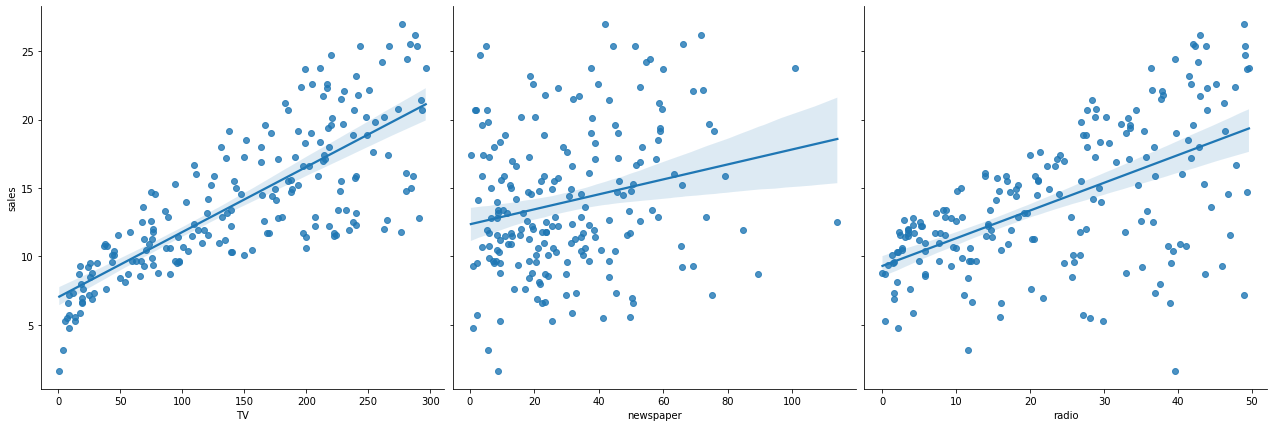

In [31]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','newspaper','radio'],y_vars='sales',kind='reg',size=6)#kind = 'reg' plots linear regression directly